In [6]:
import pandas as pd
import seaborn as sn
from nltk import word_tokenize

In [4]:
path = "../datasets/dataset_full.csv"
df = pd.read_csv(path)
df.head(20)

,gene,snp,text
0,CARD14,Rs144475004,"rs144475004, also known as c.526G>C, p.Asp176H..."
1,CARD14,Rs281875212,"rs281875212, also known as c.424G>A, p.Glu142L..."
2,CARD14,Rs281875213,"rs281875213, also known as c.425A>G, p.Glu142G..."
3,CARD14,Rs281875214,"rs281875214, also known as c.413A>C, p.Glu138A..."
4,CARD14,Rs281875215,"rs281875215, also known as c.349G>A, p.Gly117S..."
5,CARD14,Rs387907240,"rs387907240, also known as c.467T>C, p.Leu156P..."
6,CARD14,Rs587777763,"rs587777763, also known as c.349+5G>A, represe..."
7,ADAM10,I6006817,rs145518263Alzheimer's disease assocation
8,ADAM10,I6006818,rs61751103Alzheimer's disease assocation
9,ADAM10,Rs145518263,"rs145518263, also known as R181G or Arg181Gly,..."


In [22]:
texts = df["text"].values
len(texts)

5214

In [24]:
unique_texts = pd.unique(df["text"])
len(unique_texts)

4361

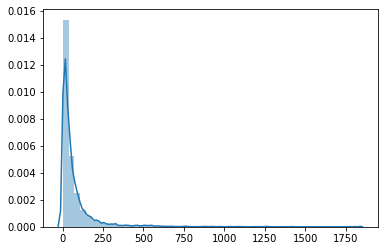

In [25]:
word_num_distribution = [len(word_tokenize(x)) for x in unique_texts]
sn.distplot(word_num_distribution)

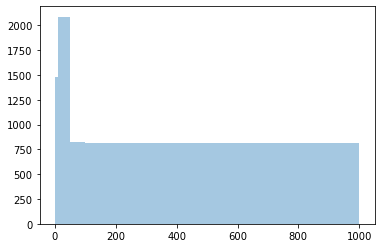

In [17]:
# Make a plot that shows exactly how many are in specific categories we could group with.
bins = [0,10,50,100,1000]
sn.distplot(word_num_distribution, bins=bins, norm_hist=False, kde=False)

In [21]:
# What is the number of texts that fall in n_0 <= x < n_1 for each bin?
for lower,upper in zip(bins[0:len(bins)-1], bins[1:len(bins)]):
    count = sum([(x>=lower and x<upper) for x in word_num_distribution])
    print("For range {} to {} there are {}".format(lower,upper,count))

For range 0 to 10 there are 1477
For range 10 to 50 there are 2088
For range 50 to 100 there are 821
For range 100 to 1000 there are 813
